# Cross-Modality Association Network

## Typical Data pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Nonas.csv')

In [3]:
df

,Unnamed: 0,Speed_MPH,ATP,BPM,JF,FF,Src_Weather_Info,NR_HR,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Days_WeekDays,Days_WeekEnd,Gender_Female,Gender_Male
0,8906,20.500000,16.90,81.0,1.70738,24.79,1.0,15.620144,27,45,8,9,9,8,6,1,0,1,0
1,8911,9.500000,20.00,84.0,1.43925,25.85,1.0,18.620144,27,45,8,9,9,8,6,1,0,1,0
2,8912,22.000000,16.60,81.0,1.70738,24.79,1.0,15.620144,27,45,8,9,9,8,6,1,0,1,0
3,8920,0.333333,16.90,90.0,2.42528,28.40,1.0,24.620144,27,45,8,9,9,8,6,1,0,1,0
4,8933,3.333333,17.30,93.0,2.42528,28.40,1.0,27.620144,27,45,8,9,9,8,6,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52742,2834878,23.000000,16.25,90.0,1.26696,34.42,0.0,22.373140,24,38,3,8,6,4,6,0,1,0,1
52743,2834883,13.000000,16.50,88.0,1.26696,34.42,0.0,20.373140,24,38,3,8,6,4,6,0,1,0,1
52744,2834890,0.000000,15.00,98.0,1.26696,34.42,0.0,30.373140,24,38,3,8,6,4,6,0,1,0,1
52745,2834893,0.000000,15.80,99.0,1.26696,34.42,0.0,31.373140,24,38,3,8,6,4,6,0,1,0,1


In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df_2=df.copy(deep=True)

In [6]:
# df_2.drop(['Src_Temperature','Src_Pressure','Src_WindSpeed','BP_Hg','Src_Humidity'],axis=1,inplace=True)

In [7]:
df_2['Src_Weather_Info'].unique()

array([1., 3., 2., 0., 5., 4.])

In [8]:
# df_2['Src_Weather_Info'].replace(['Clear','Clouds','Drizzle','Haze','Thunderstorm'],
#                         [0,1,2,3,4], inplace=True)

In [9]:
# df_2.drop(['Unnamed: 0','Time','P_ID','Day'],axis=1,inplace=True)

In [10]:
# df_2=pd.get_dummies(df_2, columns=['Gender'])

In [11]:
df_2.rename(columns={"NR_HR": "HR_Norm", "JF": "Jam Factor","FF":"Free Flow","Speed_MPH":"Speed",'Days_WeekDays':'Weekday','Days_WeekEnd':'Weekend'}, inplace=True)

In [12]:
df_2.drop(['Free Flow'],axis=1,inplace=True)

In [13]:
df_2.dropna(axis=0,inplace=True)

In [14]:
df_2

,Speed,ATP,BPM,Jam Factor,Src_Weather_Info,HR_Norm,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Weekend,Gender_Female,Gender_Male
0,20.500000,16.90,81.0,1.70738,1.0,15.620144,27,45,8,9,9,8,6,1,0,1,0
1,9.500000,20.00,84.0,1.43925,1.0,18.620144,27,45,8,9,9,8,6,1,0,1,0
2,22.000000,16.60,81.0,1.70738,1.0,15.620144,27,45,8,9,9,8,6,1,0,1,0
3,0.333333,16.90,90.0,2.42528,1.0,24.620144,27,45,8,9,9,8,6,1,0,1,0
4,3.333333,17.30,93.0,2.42528,1.0,27.620144,27,45,8,9,9,8,6,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52742,23.000000,16.25,90.0,1.26696,0.0,22.373140,24,38,3,8,6,4,6,0,1,0,1
52743,13.000000,16.50,88.0,1.26696,0.0,20.373140,24,38,3,8,6,4,6,0,1,0,1
52744,0.000000,15.00,98.0,1.26696,0.0,30.373140,24,38,3,8,6,4,6,0,1,0,1
52745,0.000000,15.80,99.0,1.26696,0.0,31.373140,24,38,3,8,6,4,6,0,1,0,1


In [15]:
df_2=(df_2-df_2.min())/(df_2.max()-df_2.min())

## Scaling the Data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scalar=StandardScaler()

In [18]:
def scale_df(df):
    scalar=StandardScaler()
    scalar.fit(df)
    df_scale=scalar.transform(df)
    df_scaled=pd.DataFrame(data=df_scale, columns=df.columns)
    return df_scaled

In [19]:
df_scaled=scale_df(df_2)

In [20]:
df_scaled

,Speed,ATP,BPM,Jam Factor,Src_Weather_Info,HR_Norm,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Weekend,Gender_Female,Gender_Male
0,-0.448928,-0.348440,-0.580755,0.362521,0.390254,-0.915024,-0.049850,0.284753,1.108892,1.356864,1.397042,1.439245,-0.428421,0.605512,-0.605512,0.870093,-0.870093
1,-0.888334,-0.147704,-0.308203,0.150001,0.390254,-0.658167,-0.049850,0.284753,1.108892,1.356864,1.397042,1.439245,-0.428421,0.605512,-0.605512,0.870093,-0.870093
2,-0.389009,-0.367866,-0.580755,0.362521,0.390254,-0.915024,-0.049850,0.284753,1.108892,1.356864,1.397042,1.439245,-0.428421,0.605512,-0.605512,0.870093,-0.870093
3,-1.254505,-0.348440,0.236900,0.931527,0.390254,-0.144454,-0.049850,0.284753,1.108892,1.356864,1.397042,1.439245,-0.428421,0.605512,-0.605512,0.870093,-0.870093
4,-1.134667,-0.322538,0.509452,0.931527,0.390254,0.112403,-0.049850,0.284753,1.108892,1.356864,1.397042,1.439245,-0.428421,0.605512,-0.605512,0.870093,-0.870093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52742,-0.349063,-0.390530,0.236900,0.013445,-1.165189,-0.336840,-0.417517,-0.669314,-1.253339,0.802960,-1.046523,-0.626380,-0.428421,-1.651496,1.651496,-1.149302,1.149302
52743,-0.748523,-0.374341,0.055199,0.013445,-1.165189,-0.508078,-0.417517,-0.669314,-1.253339,0.802960,-1.046523,-0.626380,-0.428421,-1.651496,1.651496,-1.149302,1.149302
52744,-1.267821,-0.471472,0.963704,0.013445,-1.165189,0.348111,-0.417517,-0.669314,-1.253339,0.802960,-1.046523,-0.626380,-0.428421,-1.651496,1.651496,-1.149302,1.149302
52745,-1.267821,-0.419669,1.054555,0.013445,-1.165189,0.433730,-0.417517,-0.669314,-1.253339,0.802960,-1.046523,-0.626380,-0.428421,-1.651496,1.651496,-1.149302,1.149302


In [21]:
# from scipy.stats import probplot
# for i in df_2.columns:
#     probplot(x=df_2[i],dist='norm',plot=plt)
#     plt.title(i)
#     plt.show()

In [22]:
# from sklearn.preprocessing import FunctionTransformer

In [23]:
# from sklearn.compose import ColumnTransformer

In [24]:
# df_2.columns

In [25]:
# df_2=df_2.drop('Src_Weather_Info', axis=1)

In [26]:
# log_transform = FunctionTransformer(lambda x: np.log(x))
# ct = ColumnTransformer(transformers=[['log_transform',log_transform,list(range(len(df_scaled.columns)))]],remainder='passthrough')
# log_X = ct.fit_transform(df_scaled).copy()
# log_X = pd.DataFrame(log_X,columns=df_scaled.columns).copy()

## Building the Network

In [27]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

def calculate_spearman(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(spearmanr(df[r], df[c])[1], 4)
    return pvalues
def calculate_pearson(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [28]:
def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]

In [29]:
from scipy import stats

In [30]:
df_corr = pd.DataFrame()
df_p = pd.DataFrame()  
for x in df_2.columns:
    for y in df_2.columns:
        corr = stats.spearmanr(df_2[x], df_2[y])
        df_corr.loc[x,y] = corr[0]
        df_p.loc[x,y] = corr[1]

In [31]:
df_p

,Speed,ATP,BPM,Jam Factor,Src_Weather_Info,HR_Norm,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Weekend,Gender_Female,Gender_Male
Speed,0.000000e+00,0.000000e+00,2.638555e-02,0.000000e+00,1.383339e-02,1.046494e-04,2.149662e-207,1.068174e-55,8.879378e-153,0.000000e+00,1.076007e-55,0.000000e+00,0.000000e+00,7.254010e-39,7.254010e-39,0.000000e+00,0.000000e+00
ATP,0.000000e+00,0.000000e+00,5.149357e-299,0.000000e+00,8.043611e-35,0.000000e+00,3.037383e-46,0.000000e+00,4.147005e-66,8.493240e-240,4.811162e-13,0.000000e+00,6.500649e-01,1.184894e-14,1.184894e-14,0.000000e+00,0.000000e+00
BPM,2.638555e-02,5.149357e-299,0.000000e+00,1.292787e-13,3.650870e-56,0.000000e+00,0.000000e+00,0.000000e+00,1.620465e-45,5.247773e-04,0.000000e+00,0.000000e+00,0.000000e+00,2.379003e-100,2.379003e-100,1.172651e-20,1.172651e-20
Jam Factor,0.000000e+00,0.000000e+00,1.292787e-13,0.000000e+00,2.547058e-49,1.143901e-42,1.676665e-08,3.622633e-254,6.380022e-54,0.000000e+00,2.004206e-120,0.000000e+00,0.000000e+00,2.028062e-148,2.028062e-148,0.000000e+00,0.000000e+00
Src_Weather_Info,1.383339e-02,8.043611e-35,3.650870e-56,2.547058e-49,0.000000e+00,1.560004e-01,3.414497e-28,3.432529e-22,2.637245e-01,8.282769e-72,2.297363e-07,2.338340e-22,3.665678e-43,0.000000e+00,0.000000e+00,5.062850e-166,5.062850e-166
HR_Norm,1.046494e-04,0.000000e+00,0.000000e+00,1.143901e-42,1.560004e-01,0.000000e+00,1.881405e-44,1.044389e-291,8.785385e-32,0.000000e+00,8.160664e-60,7.984455e-50,5.534864e-146,0.000000e+00,0.000000e+00,9.701836e-89,9.701836e-89
Age,2.149662e-207,3.037383e-46,0.000000e+00,1.676665e-08,3.414497e-28,1.881405e-44,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.067024e-106,1.068314e-09,7.371069e-216,7.371069e-216,0.000000e+00,0.000000e+00
Trait_Anxiety,1.068174e-55,0.000000e+00,0.000000e+00,3.622633e-254,3.432529e-22,1.044389e-291,0.000000e+00,0.000000e+00,2.914803e-147,3.072640e-44,0.000000e+00,0.000000e+00,0.000000e+00,1.245847e-02,1.245847e-02,0.000000e+00,0.000000e+00
Extraversion,8.879378e-153,4.147005e-66,1.620465e-45,6.380022e-54,2.637245e-01,8.785385e-32,0.000000e+00,2.914803e-147,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.128478e-250,4.754736e-20,4.754736e-20,1.191435e-278,1.191435e-278
Agreeableness,0.000000e+00,8.493240e-240,5.247773e-04,0.000000e+00,8.282769e-72,0.000000e+00,0.000000e+00,3.072640e-44,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.779016e-47,2.779016e-47,0.000000e+00,0.000000e+00


In [32]:
# df_2=df_scaled

In [33]:
# corr_matrix=df_2.corr().abs()
# half_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# dropped_columns = [column for column in half_matrix.columns if any(half_matrix[column] > 0.8)]
# df_2.drop(dropped_columns, axis=1, inplace=True)
# dropped_columns

In [34]:
calculate_spearman(df_2)

,Speed,ATP,BPM,Jam Factor,Src_Weather_Info,HR_Norm,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Weekend,Gender_Female,Gender_Male
Speed,0.0,0.0,0.0264,0.0,0.0138,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6501,0.0,0.0,0.0,0.0
BPM,0.0264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0005,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jam Factor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Src_Weather_Info,0.0138,0.0,0.0,0.0,0.0,0.156,0.0,0.0,0.2637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HR_Norm,0.0001,0.0,0.0,0.0,0.156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Trait_Anxiety,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0125,0.0125,0.0,0.0
Extraversion,0.0,0.0,0.0,0.0,0.2637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Agreeableness,0.0,0.0,0.0005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df_2.corr()

,Speed,ATP,BPM,Jam Factor,Src_Weather_Info,HR_Norm,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Weekend,Gender_Female,Gender_Male
Speed,1.000000,0.342288,-0.008923,-0.331973,0.005637,-0.024014,-0.128229,-0.088141,-0.132550,-0.310308,-0.092296,-0.226762,0.317554,-0.058798,0.058798,-0.200507,0.200507
ATP,0.342288,1.000000,0.215834,-0.162393,-0.093663,-0.087767,-0.018377,-0.133056,0.051803,-0.100617,0.078466,-0.147572,-0.041859,0.014031,-0.014031,-0.252799,0.252799
BPM,-0.008923,0.215834,1.000000,0.028609,-0.077432,0.639246,-0.436556,0.303332,0.059807,-0.014283,0.293409,0.190668,-0.182447,0.090477,-0.090477,-0.062640,0.062640
Jam Factor,-0.331973,-0.162393,0.028609,1.000000,-0.007444,-0.031796,0.025184,0.135787,0.100254,0.191428,0.109862,0.187065,-0.222545,0.116346,-0.116346,0.183527,-0.183527
Src_Weather_Info,0.005637,-0.093663,-0.077432,-0.007444,1.000000,0.007893,0.004438,0.010406,0.052761,0.057732,0.039090,0.022634,0.068036,-0.182193,0.182193,0.080385,-0.080385
HR_Norm,-0.024014,-0.087767,0.639246,-0.031796,0.007893,1.000000,-0.157387,0.139544,0.063260,-0.088595,0.113490,0.075961,-0.001690,0.191448,-0.191448,-0.076898,0.076898
Age,-0.128229,-0.018377,-0.436556,0.025184,0.004438,-0.157387,1.000000,-0.479893,0.357912,0.342553,-0.139321,-0.198924,-0.004406,0.061371,-0.061371,0.299627,-0.299627
Trait_Anxiety,-0.088141,-0.133056,0.303332,0.135787,0.010406,0.139544,-0.479893,1.000000,-0.176836,0.188683,0.256057,0.632010,-0.418866,0.007834,-0.007834,0.563622,-0.563622
Extraversion,-0.132550,0.051803,0.059807,0.100254,0.052761,0.063260,0.357912,-0.176836,1.000000,0.468827,0.446284,0.276159,-0.293786,0.041519,-0.041519,0.138853,-0.138853
Agreeableness,-0.310308,-0.100617,-0.014283,0.191428,0.057732,-0.088595,0.342553,0.188683,0.468827,1.000000,0.282573,0.458398,-0.750863,-0.020165,0.020165,0.487336,-0.487336


In [36]:
import networkx as nx

In [37]:
from matplotlib.pyplot import figure

In [38]:
G=nx.Graph()

In [39]:
pvals=calculate_spearman(df_2)

In [40]:
columns=pvals.columns

In [41]:
pvalues=pvals.values

In [42]:
nonzero=[]
for row in pvalues:
    for val in row:
        if val!=0:
            nonzero.append(val)

In [43]:
benjamini_hochberg=[]

In [44]:
sort=sorted(nonzero)
for i in range(len(sort)):
    benjamini_hochberg.append((i+1)*0.05) 

In [45]:
benjamini_hochberg

[0.05,
 0.1,
 0.15000000000000002,
 0.2,
 0.25,
 0.30000000000000004,
 0.35000000000000003,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6000000000000001,
 0.65,
 0.7000000000000001,
 0.75,
 0.8,
 0.8500000000000001,
 0.9,
 0.9500000000000001,
 1.0,
 1.05,
 1.1]

In [46]:
sort

[0.0001,
 0.0001,
 0.0002,
 0.0002,
 0.0002,
 0.0002,
 0.0005,
 0.0005,
 0.0125,
 0.0125,
 0.0125,
 0.0125,
 0.0138,
 0.0138,
 0.0264,
 0.0264,
 0.156,
 0.156,
 0.2637,
 0.2637,
 0.6501,
 0.6501]

In [47]:
# sm.stats.multitest.multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)

In [48]:
columns

Index(['Speed', 'ATP', 'BPM', 'Jam Factor', 'Src_Weather_Info', 'HR_Norm',
       'Age', 'Trait_Anxiety', 'Extraversion', 'Agreeableness',
       'Conscientiousness', 'Neuroticism', 'Openness', 'Weekday', 'Weekend',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [49]:
nonzeros={}
nonzeros['Indexes']=[]
nonzeros['Elements']=[]
nonzeros['Columns']=[]
for index, col in pvals.iteritems():
    counter=0
    arr=col.values
    for elem in arr:
        if elem>0:
            nonzeros['Indexes'].append(index)
            nonzeros['Elements'].append(elem)
            nonzeros['Columns'].append(columns[counter])
        counter+=1

In [50]:
df_map=pd.DataFrame()

In [51]:
df_map['Source']=nonzeros['Indexes']

In [52]:
df_map['Destination']=nonzeros['Columns']

In [53]:
df_map['Weights']=-np.log(nonzeros['Elements'])

In [54]:
df_map

,Source,Destination,Weights
0,Speed,BPM,3.634391
1,Speed,Src_Weather_Info,4.283087
2,Speed,HR_Norm,9.210340
3,ATP,Openness,0.430629
4,BPM,Speed,3.634391
5,BPM,Agreeableness,7.600902
6,Src_Weather_Info,Speed,4.283087
7,Src_Weather_Info,HR_Norm,1.857899
8,Src_Weather_Info,Extraversion,1.332943
9,HR_Norm,Speed,9.210340


In [55]:
G = nx.from_pandas_edgelist(df_map, source='Source', target='Destination',
                            edge_attr='Weights')

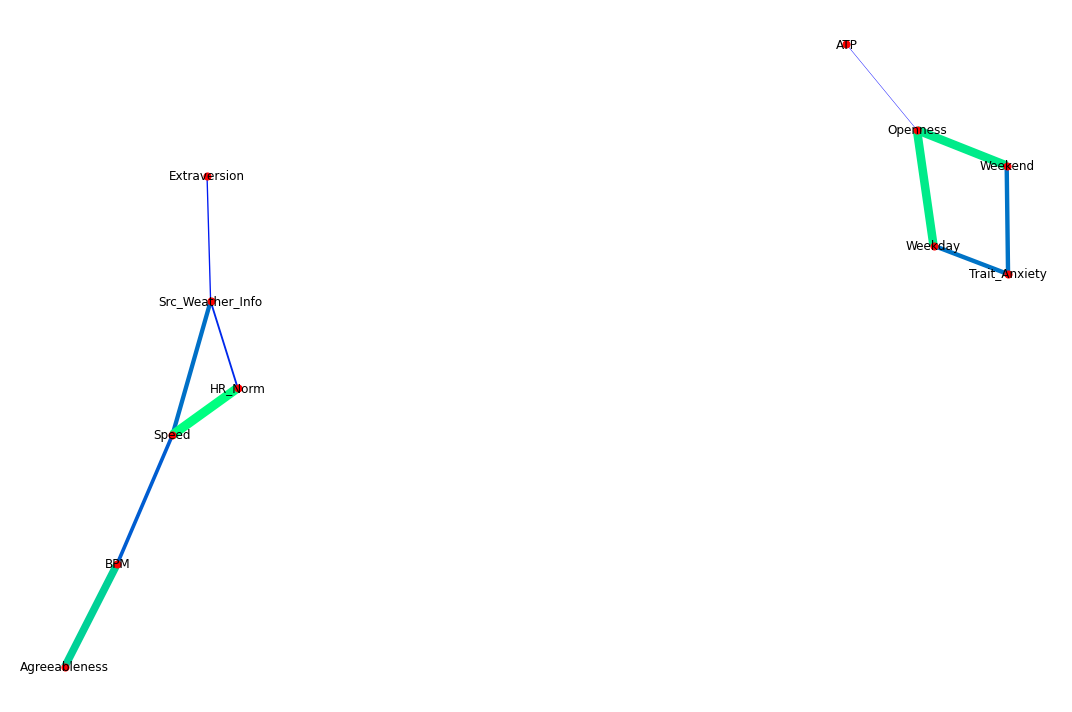

In [56]:
widths = np.array([w for *_, w in G.edges.data('Weights')])
plt.figure(figsize=(15,10))
colors = range(172)

pos = nx.spring_layout(G, seed=7) 

nx.draw_networkx_nodes(G, pos, node_size=50, node_color='r')

nx.draw_networkx_edges(G, pos, width=widths, edge_color=widths, edge_cmap=plt.cm.winter)

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.tight_layout()

## Community Detection

In [57]:
import networkx.algorithms.community as nx_com

In [58]:
from community import community_louvain

We can define a new centrality measure that computes the sum of the absolute values of the weights from each node. 

In [59]:
def weighted_centrality(df):
    new_centrality={}
    for index, row in df.iterrows():
        if row['Source'] not in new_centrality.keys():
            new_centrality[row['Source']]=0
        new_centrality[row['Source']]+=np.abs(row['Weights'])
        if row['Destination'] not in new_centrality.keys():
            new_centrality[row['Destination']]=0
        new_centrality[row['Destination']]+=np.abs(row['Weights'])
    return new_centrality

The following method does the following: for a graph G, it applies the louvain detection algorithm 1000 times, and counts how often each pair of features is grouped together. It then determines the best way to split the features into distinct groups (communities). 

In [60]:
def louvain_detection(G):
    nodes=list(G.nodes())
    prevalences={}
    deg_centrality = nx.degree_centrality(G)
    widths = np.array([w for *_, w in G.edges.data('Weights')])
    centrality = np.fromiter(deg_centrality.values(), float)
    label = community_louvain.best_partition(G)
    mod = community_louvain.modularity(label, G)
    values = [label.get(node) for node in G.nodes()]
    for i in range(len(values)-1):
        for j in range(i+1, len(values)):
            prevalences[(nodes[i],nodes[j])]=0 #initialize dictionary containing how often each pair grouped together
    for i in range(1000):
        deg_centrality = nx.degree_centrality(G)
        centrality = np.fromiter(deg_centrality.values(), float)
        label = community_louvain.best_partition(G)
        mod = community_louvain.modularity(label, G)
        values = [label.get(node) for node in G.nodes()]
        for j in range(len(values)-1):
            for k in range(j+1, len(values)):
                if values[j]==values[k]:
                    prevalences[(nodes[j],nodes[k])]+=1 #add one if pair grouped together 
    consen={} #initialize consensus dictionary
    for node in nodes:
        consen[node]=[]
    for key in prevalences.keys():
        consen[key[0]].append((key[1],prevalences[key]))
    pairs=[]
    for key in consen.keys():
        for elem in consen[key]:
            if elem[1]>500: #if pair grouped together more than 50% of the time, 
                            #group the elements together in consensus network
                pairs.append((key, elem[0]))
    vals={} #initialize dictionary that contains final groupings
    for i in range(len(nodes)):
        vals[nodes[i]]=i
    for i in range(len(pairs)):
        vals[pairs[i][1]]=vals[pairs[i][0]]
    values=[] #initialize array that takes final groupings
    for i in range(len(nodes)):
        values.append(0)
    for key in vals.keys():
        values[nodes.index(key)]=vals[key] #
    #Draw the graph

    plt.figure(figsize=(15,10))



    pos = nx.spring_layout(G)
    nx.draw(G, pos, nodelist=nodes, node_color=values, node_size=500, cmap=plt.cm.hsv)

    nx.draw_networkx_edges(G, pos, width=widths, edge_color=widths, edge_cmap=plt.cm.winter)

    nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
    plt.show()
    
    

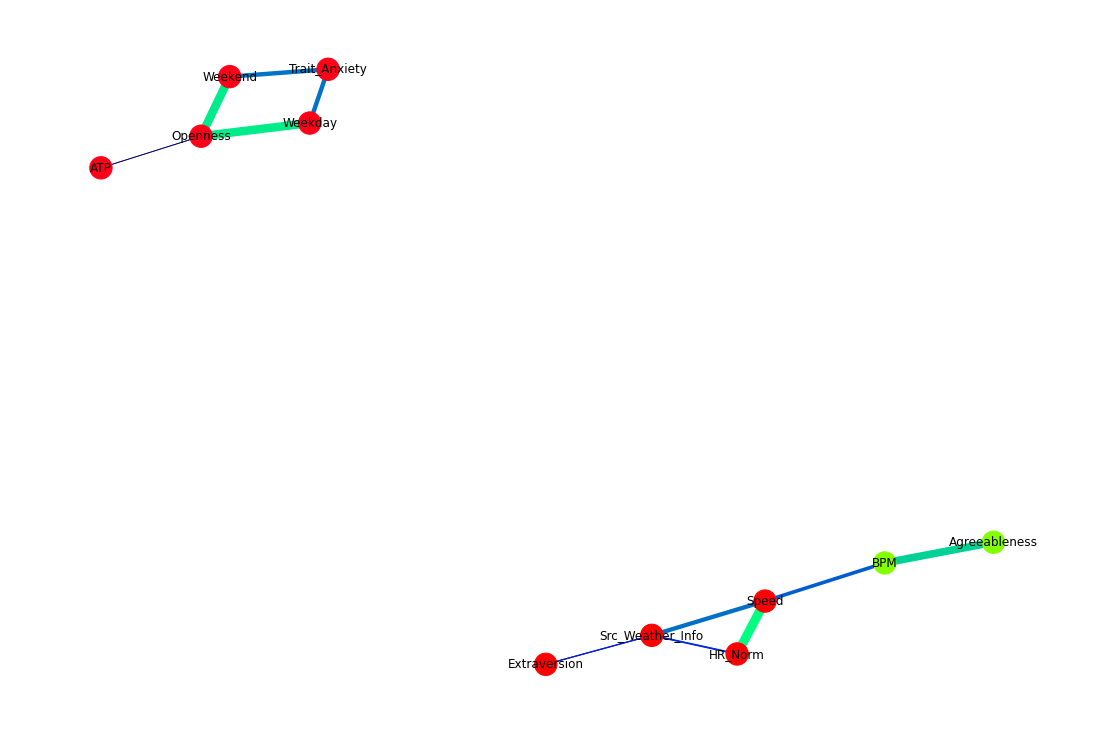

In [61]:
louvain_detection(G)

## Building the Markov Network

In [62]:
# centrality=nx.eigenvector_centrality(G, weight=widths.any())

In [63]:
# sorted((f"{c:0.2f}", v) for v, c in centrality.items())

In [64]:
from sklearn.covariance import GraphicalLasso

In [65]:
def invcov(df):
    gl=GraphicalLasso()
    fit=gl.fit(df.values)
    inv_cov=pd.DataFrame(data=fit.covariance_,columns=df.columns)
    index={}
    for i in range(len(df.columns)):
        index[i]=df.columns[i]
    inv_cov.rename(index=index, inplace=True)
    return inv_cov

In [66]:
inv_cov=invcov(df_2)

In [67]:
inv_cov

,Speed,ATP,BPM,Jam Factor,Src_Weather_Info,HR_Norm,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Weekend,Gender_Female,Gender_Male
Speed,6.394164e-02,4.688503e-03,5.711843e-05,-5.911209e-04,6.778615e-07,-3.613291e-06,-2.451655e-03,-0.005159,-0.004907,-0.013611,-2.450961e-03,-0.006976,0.010458,-0.000316,0.000313,-0.015107,0.015107
ATP,4.688503e-03,2.879981e-02,3.024224e-05,-1.001720e-04,4.602466e-07,-2.453311e-06,-1.298089e-03,-0.003553,-0.001226,-0.003542,-9.029958e-04,-0.003348,0.002695,-0.000214,0.000213,-0.011245,0.011244
BPM,5.711843e-05,3.024224e-05,1.120156e-02,-3.937923e-06,2.261281e-08,-1.205359e-07,-1.424358e-03,0.000612,-0.000390,-0.000361,-3.591425e-05,0.000084,0.000111,-0.000011,0.000011,-0.000622,0.000622
Jam Factor,-5.911209e-04,-1.001720e-04,-3.937923e-06,1.591820e-02,-5.999729e-08,3.198112e-07,1.690277e-04,0.000463,0.000159,0.000459,1.173192e-04,0.000436,-0.000349,0.000028,-0.000028,0.001466,-0.001466
Src_Weather_Info,6.778615e-07,4.602466e-07,2.261281e-08,-5.999729e-08,1.653299e-02,-4.011988e-06,-9.018072e-07,-0.000003,-0.000001,-0.000003,-8.084453e-07,-0.000003,0.000002,-0.000379,0.000379,-0.000010,0.000010
HR_Norm,-3.613291e-06,-2.453311e-06,-1.205359e-07,3.198112e-07,-4.011988e-06,2.008945e-02,4.807017e-06,0.000017,0.000005,0.000015,4.309359e-06,0.000016,-0.000011,0.002023,-0.002023,0.000051,-0.000051
Age,-2.451655e-03,-1.298089e-03,-1.424358e-03,1.690277e-04,-9.018072e-07,4.807017e-06,6.113714e-02,-0.026274,0.016760,0.015486,1.541495e-03,-0.003606,-0.004764,0.000420,-0.000422,0.026687,-0.026687
Trait_Anxiety,-5.159211e-03,-3.552584e-03,6.121321e-04,4.631370e-04,-3.257116e-06,1.736182e-05,-2.627428e-02,0.093458,-0.006348,0.018026,9.220865e-03,0.043451,-0.022624,0.001518,-0.001506,0.075325,-0.075324
Extraversion,-4.906976e-03,-1.225691e-03,-3.904672e-04,1.586886e-04,-1.017935e-06,5.426030e-06,1.675978e-02,-0.006348,0.091432,0.032656,2.313524e-02,0.013101,-0.017508,0.000474,-0.000469,0.021374,-0.021374
Agreeableness,-1.361067e-02,-3.542314e-03,-3.607968e-04,4.588193e-04,-2.726633e-06,1.453412e-05,1.548629e-02,0.018026,0.032656,0.090538,1.308211e-02,0.030053,-0.047563,0.001271,-0.001260,0.062614,-0.062614


In [70]:
modalities={'Speed':0,'ATP':0,'Src_Weather_Info':1,'Des_Weather_Info':1,'Age':5,'Trait_Anxiety':2,'Extraversion':2,'Agreeableness':2,'RTP':0,
           'Neuroticism':2,'Gender_Female':5,'Weekday':1,'Weekend':1,'HR_Norm':4,'Conscientiousness':2,'Free Flow':1,'Jam Factor':1,'Openness':2, 'Gender_Male':5,'BPM':4}

In [71]:
def create_invcov_df(df):
    columns=df.columns
    nonzero={}
    nonzero['Indexes']=[]
    nonzero['Elements']=[]
    nonzero['Columns']=[]
    for index, col in df.iteritems():
        counter=0
        arr=col.values
        for elem in arr:
            if np.absolute(elem-1)>0.000001 and index!=columns[counter]: #eliminate correlations between same variable
                if modalities[index]*modalities[columns[counter]]!=5 and modalities[index]*modalities[columns[counter]]!=2:
                    nonzero['Indexes'].append(index)
                    nonzero['Elements'].append(elem*2)
                    nonzero['Columns'].append(columns[counter])
            counter+=1
    df_map=pd.DataFrame()
    df_map['Source']=nonzero['Indexes']
    df_map['Destination']=nonzero['Columns']
    df_map['Weights']=nonzero['Elements']
    return df_map

In [72]:
df_map2=create_invcov_df(inv_cov)

In [73]:
df_map2

,Source,Destination,Weights
0,Speed,ATP,0.009377
1,Speed,BPM,0.000114
2,Speed,Jam Factor,-0.001182
3,Speed,Src_Weather_Info,0.000001
4,Speed,HR_Norm,-0.000007
...,...,...,...
195,Gender_Male,Agreeableness,-0.125228
196,Gender_Male,Conscientiousness,-0.034929
197,Gender_Male,Neuroticism,-0.135750
198,Gender_Male,Openness,0.094957


Define the data features into different modalities, like biometric data (gender and age), psychometric data (extraversion, neuroticism, etc.), and so on.

In [74]:
modalities={'Speed':0,'ATP':0,'Src_Weather_Info':1,'Weather':1,'Des_Weather_Info':1,'Age':5,'Trait_Anxiety':2,'Extraversion':2,'Agreeableness':2,'RTP':0,
           'Neuroticism':2,'Gender_Female':5,'Weekday':1,'Weekend':1,'HR_Norm':4,'Conscientiousness':2,'Free Flow':1,'Jam Factor':1,'Openness':2, 'Gender_Male':5,'BPM':4, 'Div':4}

In [75]:
G = nx.from_pandas_edgelist(df_map2, source='Source', target='Destination',
                            edge_attr='Weights') 
pos = nx.spring_layout(G, seed=7) 

In [76]:
nodelist=[]
for key in pos.keys():
    nodelist.append(key)

In [77]:
vals2=[]
vals3={}
for key in nodelist:
    vals2.append(modalities[key])
    vals3[key]=modalities[key] 

First, the graph with all edges

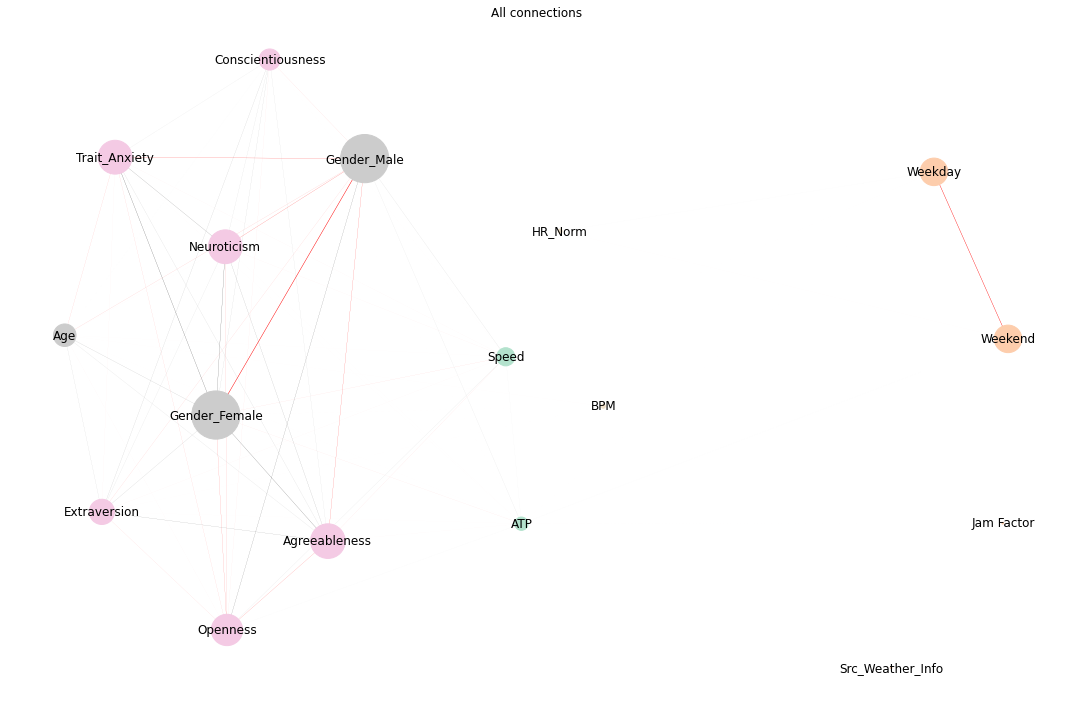

In [78]:
G = nx.from_pandas_edgelist(df_map2, source='Source', target='Destination',
                            edge_attr='Weights') 
centrality=nx.eigenvector_centrality(G, weight=widths.any())
for v, c in centrality.items():
    centrality[v]=c*c
widths = np.array([w for *_, w in G.edges.data('Weights')])
edge_color=[]
for width in widths:
    if width>0:
        edge_color.append('#000000')
    else:
        edge_color.append('r')
plt.figure(figsize=(15,10))
colors

pos = nx.spring_layout(G, seed=7) 

nx.draw_networkx_nodes(G, pos, nodelist=nodelist, node_size=[np.absolute(weighted_centrality(df_map2)[node])*1000 for node in nodelist], node_color=[vals2[nodelist.index(node)] for node in nodelist], cmap=plt.cm.Pastel2)

nx.draw_networkx_edges(G, pos, width=widths, edge_color=edge_color)

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.title("All connections")
plt.tight_layout()

In [79]:
df_map2

,Source,Destination,Weights
0,Speed,ATP,0.009377
1,Speed,BPM,0.000114
2,Speed,Jam Factor,-0.001182
3,Speed,Src_Weather_Info,0.000001
4,Speed,HR_Norm,-0.000007
...,...,...,...
195,Gender_Male,Agreeableness,-0.125228
196,Gender_Male,Conscientiousness,-0.034929
197,Gender_Male,Neuroticism,-0.135750
198,Gender_Male,Openness,0.094957


In [80]:
# df_psych=scale_df(df_psych)

In [81]:
# inv_psych=invcov(df_psych)

In [82]:
# inv_psych

In [83]:
# df_mapsych=create_invcov_df(inv_psych)

In [84]:
# df_mapsych

In [85]:
# G = nx.from_pandas_edgelist(df_mapsych, source='Source', target='Destination',
#                             edge_attr='Weights') 
# pos = nx.spring_layout(G, seed=7) 
# nodelist=[]
# for key in pos.keys():
#     nodelist.append(key)

In [86]:
# vals2=[]
# vals3={}
# for key in nodelist:
#     vals2.append(modalities[key])
#     vals3[key]=modalities[key] 

In [87]:
# G = nx.from_pandas_edgelist(df_mapsych, source='Source', target='Destination',
#                             edge_attr='Weights') 
# centrality=nx.eigenvector_centrality(G, weight=widths.any())
# for v, c in centrality.items():
#     centrality[v]=c*c
# widths = np.array([w for *_, w in G.edges.data('Weights')])
# edge_color=[]
# for width in widths:
#     if width>0:
#         edge_color.append(0.1)
#     else:
#         edge_color.append(-0.1)
# plt.figure(figsize=(15,10))
# colors

# pos = nx.spring_layout(G, seed=7)
# nodelist=[]
# for key in pos.keys():
#     nodelist.append(key)

# nx.draw_networkx_nodes(G, pos, nodelist=nodelist, node_size=[np.absolute(weighted_centrality(df_mapsych)[node])*200 for node in nodelist], node_color=[vals2[nodelist.index(node)] for node in nodelist], cmap=plt.cm.Pastel1)

# nx.draw_networkx_edges(G, pos, width=widths, edge_color=edge_color, edge_cmap=plt.cm.bwr)

# nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

# ax = plt.gca()
# ax.margins(0.01)
# plt.axis("off")
# plt.title("Psychometric/Biometric connections")
# plt.tight_layout()

In [88]:
df_2

,Speed,ATP,BPM,Jam Factor,Src_Weather_Info,HR_Norm,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Weekend,Gender_Female,Gender_Male
0,0.207071,0.185714,0.250000,0.170738,0.2,0.201546,0.181818,0.541667,0.714286,1.000000,0.8,0.714286,0.428571,1.0,0.0,1.0,0.0
1,0.095960,0.219780,0.278846,0.143925,0.2,0.237953,0.181818,0.541667,0.714286,1.000000,0.8,0.714286,0.428571,1.0,0.0,1.0,0.0
2,0.222222,0.182418,0.250000,0.170738,0.2,0.201546,0.181818,0.541667,0.714286,1.000000,0.8,0.714286,0.428571,1.0,0.0,1.0,0.0
3,0.003367,0.185714,0.336538,0.242528,0.2,0.310765,0.181818,0.541667,0.714286,1.000000,0.8,0.714286,0.428571,1.0,0.0,1.0,0.0
4,0.033670,0.190110,0.365385,0.242528,0.2,0.347171,0.181818,0.541667,0.714286,1.000000,0.8,0.714286,0.428571,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52742,0.232323,0.178571,0.336538,0.126696,0.0,0.283497,0.090909,0.250000,0.000000,0.833333,0.2,0.142857,0.428571,0.0,1.0,0.0,1.0
52743,0.131313,0.181319,0.317308,0.126696,0.0,0.259226,0.090909,0.250000,0.000000,0.833333,0.2,0.142857,0.428571,0.0,1.0,0.0,1.0
52744,0.000000,0.164835,0.413462,0.126696,0.0,0.380580,0.090909,0.250000,0.000000,0.833333,0.2,0.142857,0.428571,0.0,1.0,0.0,1.0
52745,0.000000,0.173626,0.423077,0.126696,0.0,0.392715,0.090909,0.250000,0.000000,0.833333,0.2,0.142857,0.428571,0.0,1.0,0.0,1.0


In [96]:
df_nops=df_2.drop(['Openness','Conscientiousness','Agreeableness','Extraversion','Neuroticism', 'HR_Norm'],axis=1)

In [97]:
df_nops=scale_df(df_nops)

In [98]:
inv_nops=invcov(df_nops)

/Users/shankarpadmanabhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:261: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.451218519161697e-05, tolerance: 6.253977319875527e-05
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(


In [99]:
df_manos=create_invcov_df(inv_nops)

In [100]:
G = nx.from_pandas_edgelist(df_manos, source='Source', target='Destination',
                            edge_attr='Weights') 
pos = nx.spring_layout(G, seed=7) 
nodelist=[]
for key in pos.keys():
    nodelist.append(key)

In [101]:
vals2=[]
vals3={}
for key in nodelist:
    vals2.append(modalities[key])
    vals3[key]=modalities[key] 

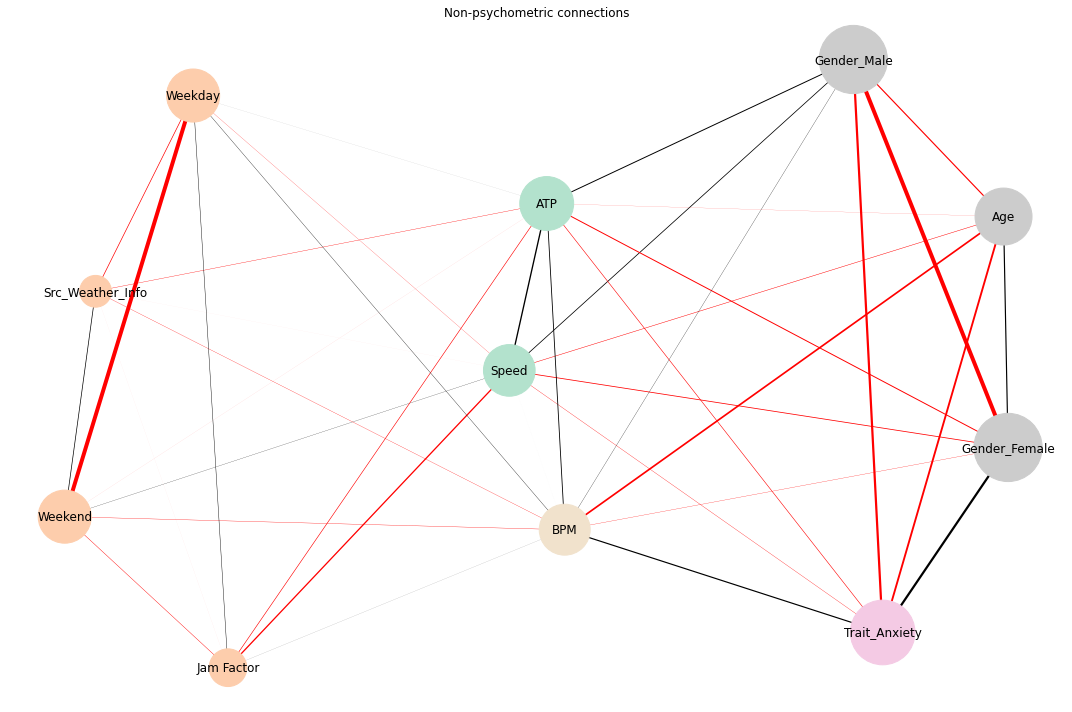

In [102]:
G = nx.from_pandas_edgelist(df_manos, source='Source', target='Destination',
                            edge_attr='Weights') 
centrality=nx.eigenvector_centrality(G, weight=widths.any())
for v, c in centrality.items():
    centrality[v]=c*c
widths = np.array([w*2 for *_, w in G.edges.data('Weights')])
edge_color=[]
for width in widths:
    if width>0:
        edge_color.append('#000000')
    else:
        edge_color.append('r')
plt.figure(figsize=(15,10))
colors

pos = nx.spring_layout(G, seed=7) 
nodelist=[]
for key in pos.keys():
    nodelist.append(key)

nx.draw_networkx_nodes(G, pos, nodelist=nodelist, node_size=[np.absolute(weighted_centrality(df_manos)[node])*500 for node in nodelist], node_color=[vals2[nodelist.index(node)] for node in nodelist], cmap=plt.cm.Pastel2)

nx.draw_networkx_edges(G, pos, width=widths, edge_color=edge_color)

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")


ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.title("Non-psychometric connections")
plt.tight_layout()

In [ ]:
df_2.corr()['ATP'].sort_values()

In [ ]:
inv_nops['Heart Rate (Norm)'].sort_values()

In [ ]:
inv_cov['ATP'].sort_values()

In [ ]:
inv_cov['Speed'].sort_values()